In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Kanpur.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Zyka Restaurant,300,"North Indian,Biryani,Desserts,Fast Food,Pizza",Kanpur,Parade,Quick Bites,1pm to 11pm(Mon-Sun),Very Good,4.1,598
1,Hot Pizza Ace,400,"Pizza,Fast Food",Kanpur,Barra,Quick Bites,10am to 1130pm(Mon-Sun),Very Good,4.0,473
2,Domino's Pizza,700,"Pizza,Fast Food",Kanpur,Kidwai Nagar Market,Quick Bites,11am to 12midnight(Mon-Sun),Good,3.5,1002
3,Mocha,1000,Cafe,Kanpur,Mall Road,Café,12noon to 12midnight(Mon-Sun),Excellent,4.8,852
4,Facebook Point,400,"Burger,Chinese,North Indian,Rolls",Kanpur,Nandlal Chawraha,Quick Bites,11am to 1130pm(Mon-Sun),Very Good,4.0,386


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 10 columns):
Name                631 non-null object
Price               631 non-null int64
Cuisine_Category    631 non-null object
City                631 non-null object
Region              631 non-null object
Cuisine_Type        631 non-null object
Timing              630 non-null object
Rating_Types        631 non-null object
Rating              631 non-null float64
Votes               631 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 49.4+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,631.000000,631.000000,631.000000
mean,412.884311,3.494612,85.114105
std,328.504912,0.410384,118.443180
min,0.000000,2.300000,4.000000
25%,200.000000,3.200000,15.000000
50%,300.000000,3.500000,42.000000
75%,500.000000,3.800000,104.500000
max,3000.000000,4.800000,1002.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              1
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Ajmeri Darbar             3
Baba Biryani              3
Pizza Yum                 3
Goli Vada Pav             2
Rakesh Chicken Biryani    2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Swaroop Nagar       57
Kakadeo             46
Mall Road           43
Ashok Nagar         42
Lal Bangla          37
Nandlal Chawraha    33
Lajpat Nagar        27
Kidwai Nagar        24
Fazalganj           23
Barra               19
Name: Region, dtype: int64

Text(0.5,1,'Region')

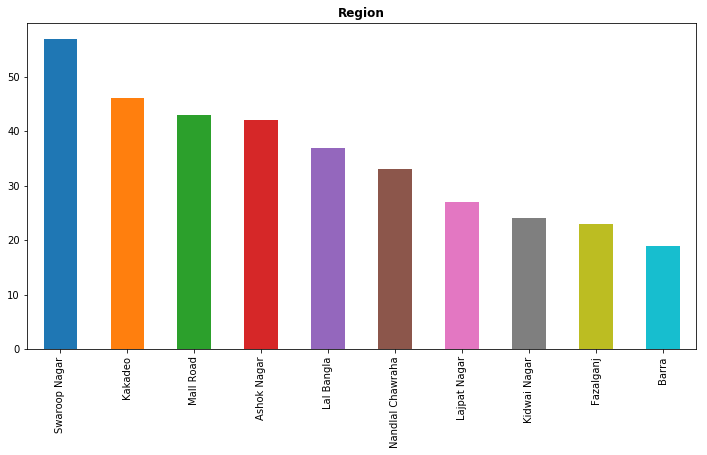

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

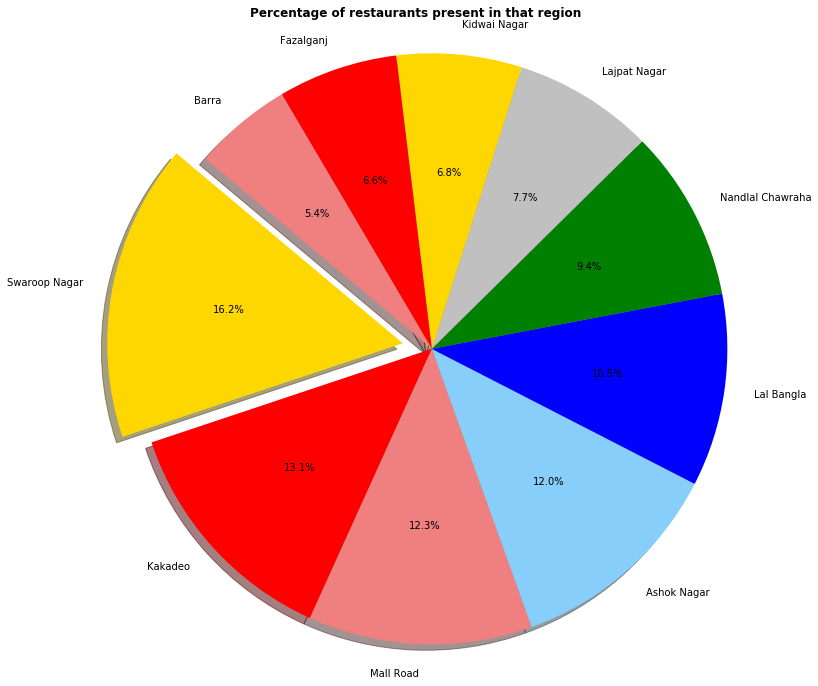

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      292
Good         239
Very Good     86
Excellent      6
Poor           3
Bom            1
Priemer        1
İyi            1
Buono          1
Średnio        1
Name: Rating_Types, dtype: int64

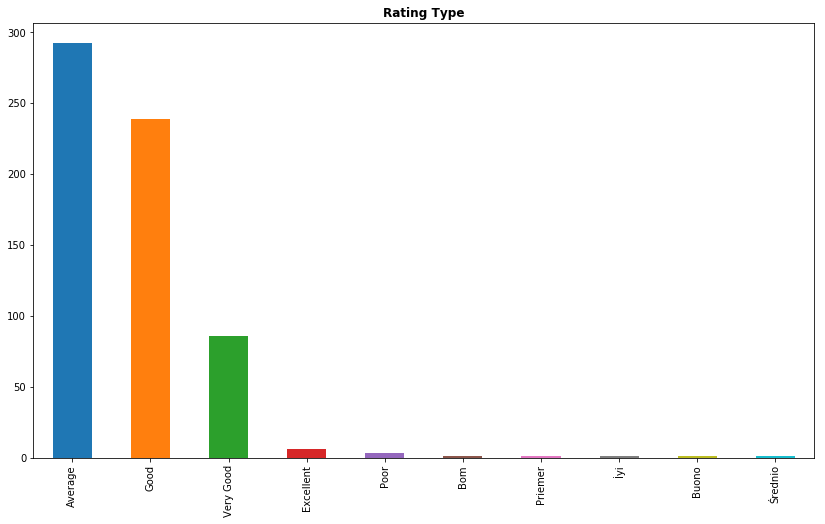

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       363
Casual Dining     120
Dessert Parlor     31
Bakery             26
Café               20
none               11
Sweet Shop         10
Fine Dining         8
Lounge              8
Beverage Shop       6
Name: Cuisine_Type, dtype: int64

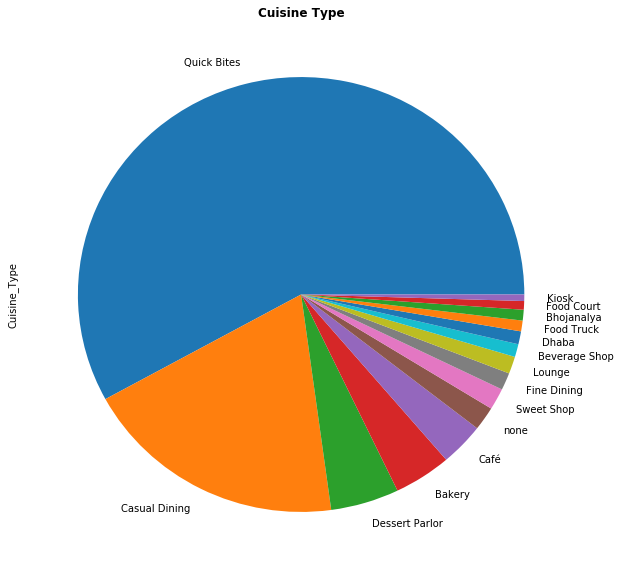

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4939682539682546


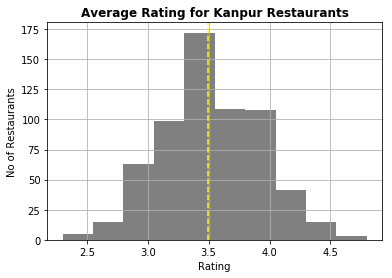

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Kanpur Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [21]:
#Average rating per restaurant in Kanpur is found to be around 3.49

# Top cuisines in Kanpur

In [22]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

In [22]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Kanpur',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

NameError: name 'cuisines_count' is not defined

<Figure size 864x432 with 0 Axes>

# Average Cost

In [23]:
data['Price'].value_counts()[:20]

300     103
200      93
400      86
500      69
250      59
150      45
600      31
350      24
100      20
800      15
700      14
450      11
1200      8
550       8
1500      8
1000      7
850       7
900       4
2500      3
2000      2
Name: Price, dtype: int64

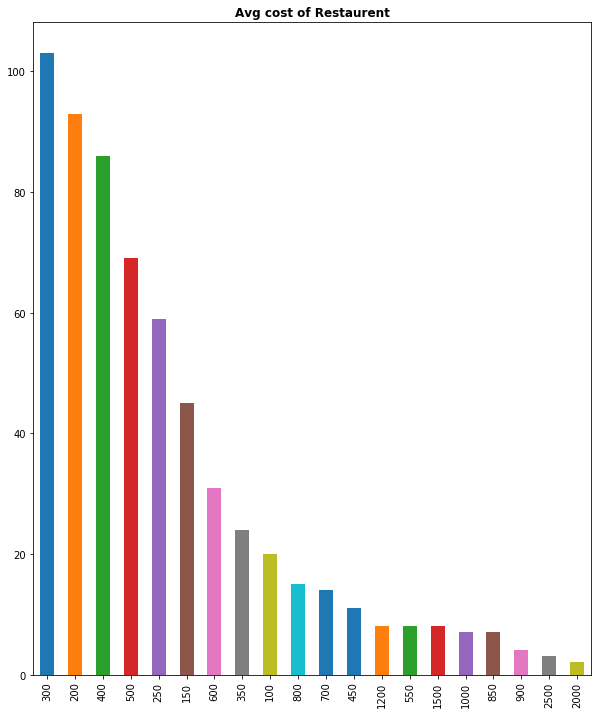

In [24]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [25]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

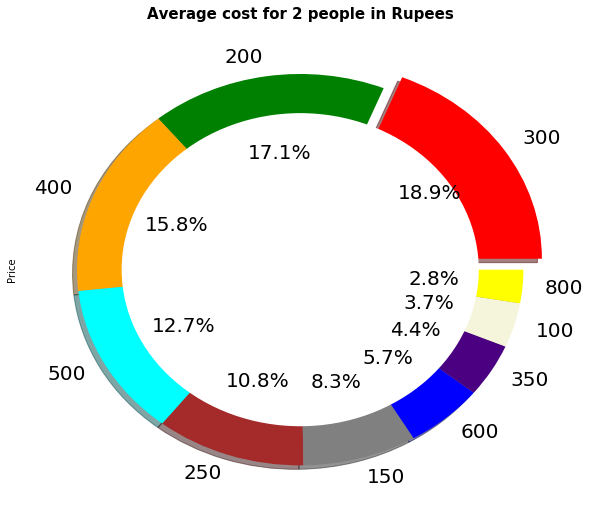

In [26]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300